In [180]:
import numpy as np, pandas as pd
from ISLP import load_data
import seaborn as sns
from matplotlib import pyplot as plt
import ISLP
from ISLP import load_data
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset
from torchmetrics import (MeanAbsoluteError ,
    R2Score)
from sklearn.metrics import f1_score
from torchinfo import summary
from torchvision.io import read_image
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import pytorch_lightning as L
from pytorch_lightning.loggers import CSVLogger
from torchvision.datasets import MNIST , CIFAR100
from IPython.display import clear_output
from torchvision.models import (resnet50 ,
    ResNet50_Weights)
from torchvision.transforms import (Resize ,
    Normalize ,
    CenterCrop ,
    ToTensor)
from ISLP.torch import (SimpleDataModule ,
    SimpleModule ,
    ErrorTracker ,
    rec_num_workers)
from ISLP.torch.imdb import (load_lookup ,
    load_tensor ,
    load_sparse ,
    load_sequential)
from glob import glob
import json
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize,
                         poly,
                         ModelSpec as MS)
from statsmodels.stats.anova import anova_lm
from pygam import (s as s_gam,
                   l as l_gam,
                   f as f_gam,
                   LinearGAM,
                   LogisticGAM)

from ISLP.transforms import (BSpline,
                             NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
                        degrees_of_freedom,
                        plot as plot_gam,
                        anova as anova_gam)
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from ISLP.models import sklearn_sm
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import SplineTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
import itertools
from ISLP import bart
from ISLP.svm import plot as plot_svm
from pygam import LinearGAM, s, f, l
from lifelines import \
(KaplanMeierFitter ,
CoxPHFitter)
from lifelines.statistics import \
(logrank_test ,
multivariate_logrank_test)
from ISLP.survival import sim_time
sns.set_palette("pastel")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [181]:
BrainCancer = load_data('BrainCancer')

In [188]:
survival_curves = []
for _ in range(1000):
    samples = resample(BrainCancer[['time', 'status']])
    kmf = KaplanMeierFitter().fit(samples['time'], event_observed=samples['status'])
    survival_curves.append(kmf.survival_function_)
survival_curve = pd.concat(survival_curves, axis=1)

In [189]:
kmf = KaplanMeierFitter().fit(BrainCancer['time'], event_observed=BrainCancer['status'])
boot_strap_curve = kmf.survival_function_
std = pd.DataFrame(survival_curve.std(axis=1), columns=['KM_estimate'])
boot_strap_curve['-1std'] = boot_strap_curve['KM_estimate'] - std['KM_estimate']
boot_strap_curve['+1std'] = boot_strap_curve['KM_estimate'] + std['KM_estimate']

In [190]:
lifeline_survival = kmf.survival_function_
lifeline_2std = kmf.confidence_interval_survival_function_
lifeline_1std = (lifeline_survival['KM_estimate'] - lifeline_2std['KM_estimate_lower_0.95'])/2

In [191]:
lifeline_curve = lifeline_survival.copy()
lifeline_curve = lifeline_curve.rename(columns={'KM_estimate': 'lifeline_km'})
lifeline_curve['lifeline-1std'] = lifeline_curve['lifeline_km'] - lifeline_1std
lifeline_curve['lifeline+1std'] = lifeline_curve['lifeline_km'] + lifeline_1std

<Axes: xlabel='timeline', ylabel='lifeline-1std'>

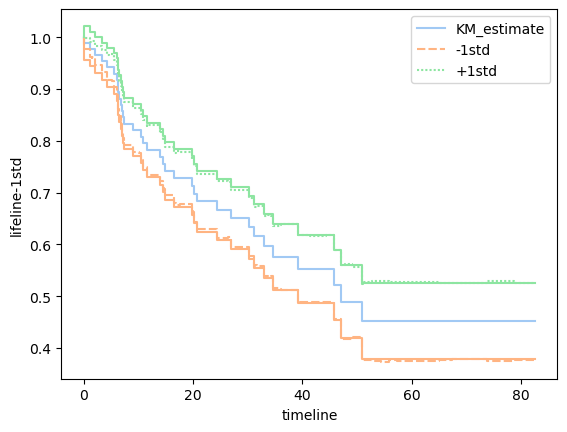

In [192]:
kmf = KaplanMeierFitter().fit(BrainCancer['time'], event_observed=BrainCancer['status'])
sns.lineplot(boot_strap_curve, drawstyle='steps-pre')
sns.lineplot(lifeline_curve['lifeline-1std'], drawstyle='steps-pre')
sns.lineplot(lifeline_curve['lifeline+1std'], drawstyle='steps-pre')

In [217]:
df = pd.get_dummies(BrainCancer)
df = df.drop(columns=['sex_Male', 'diagnosis_Meningioma', 'loc_Supratentorial', 'stereo_SRT'])

In [219]:
cph = CoxPHFitter()
cph.fit(df, 'time', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 88 total observations, 53 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 88
number of events observed = 35
   partial log-likelihood = -116.96
         time fit was run = 2025-09-20 14:54:34 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
ki                  -0.06      0.95      0.02           -0.09           -0.02                0.91                0.98
gtv                  0.03      1.04      0.02           -0.01            0.08                0.99                1.08
sex_Female          -0.17      0.85      0.36           -0.87            0.54                0.42                1.71
diagnosis_HG glioma  2.19      8.91      0.45            1.31            3.07                3.70               21.44
diagnosis_LG glioma  0.95      2.59      0.64           -0.29            2.20                0.75                9.01
diagnosis_Other      0.91      2.48      0.66           -0.39            2.20                0.68                9.02
loc_Infratentorial  -0.43      0.65      0.71           -1.82            0.95                0.16                2.58
stereo_SRS          -0.16      0.85      0.60           -1.34            1.02                0.26                2.76

                     cmp to     z      p  -log2(p)
covariate                                         
ki                     0.00 -3.04 <0.005      8.72
gtv                    0.00  1.54   0.12      3.03
sex_Female             0.00 -0.47   0.64      0.64
diagnosis_HG glioma    0.00  4.88 <0.005     19.85
diagnosis_LG glioma    0.00  1.50   0.13      2.91
diagnosis_Other        0.00  1.37   0.17      2.56
loc_Infratentorial     0.00 -0.61   0.54      0.89
stereo_SRS             0.00 -0.27   0.79      0.35
---
Concordance = 0.80
Partial AIC = 249.92
log-likelihood ratio test = 42.38 on 8 df
-log2(p) of ll-ratio test = 19.73

In [226]:
stratas = (BrainCancer[(BrainCancer['ki'] > 40) & (BrainCancer['ki'] <= 60)],
    BrainCancer[(BrainCancer['ki'] == 70)],
    BrainCancer[(BrainCancer['ki'] == 80)],
    BrainCancer[(BrainCancer['ki'] == 90)],
    BrainCancer[(BrainCancer['ki'] == 100)])

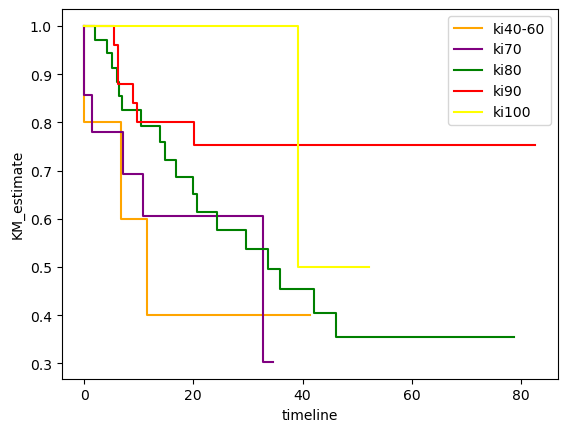

In [246]:
color = ('orange', 'purple', 'green', 'red', 'yellow')
ki = ('40-60', '70', '80' ,'90' ,'100')
for i in range(len(stratas)):
    strat = stratas[i]
    kmf = KaplanMeierFitter().fit(strat['time'], event_observed=strat['status'])
    lifeline_survival = kmf.survival_function_
    lifeline_2std = kmf.confidence_interval_survival_function_
    sns.lineplot(lifeline_survival['KM_estimate'], drawstyle='steps-pre', color = color[i], label = f'ki{ki[i]}')

In [289]:
df = BrainCancer.copy()
df = pd.get_dummies(BrainCancer)
df = df.drop(columns=['sex_Male', 'diagnosis_Meningioma', 'loc_Supratentorial', 'stereo_SRT'])

df['sex_Female'] = df['sex_Female'].mode()[0]
df['diagnosis_HG glioma'] = df['diagnosis_HG glioma'].mode()[0]
df['diagnosis_LG glioma'] = df['diagnosis_LG glioma'].mode()[0]
df['diagnosis_Other'] = df['diagnosis_Other'].mode()[0]
df['loc_Infratentorial'] = df['loc_Infratentorial'].mode()[0]
df['stereo_SRS'] = df['stereo_SRS'].mode()[0]
df['gtv'] = df['gtv'].mean()
df = df.head(5)
df['ki'] = (60,70,80,90,100)#
df.drop(columns=['status','time'])

,ki,gtv,sex_Female,diagnosis_HG glioma,diagnosis_LG glioma,diagnosis_Other,loc_Infratentorial,stereo_SRS
0,60,8.660795,True,False,False,False,False,False
1,70,8.660795,True,False,False,False,False,False
2,80,8.660795,True,False,False,False,False,False
3,90,8.660795,True,False,False,False,False,False
4,100,8.660795,True,False,False,False,False,False


<Axes: >

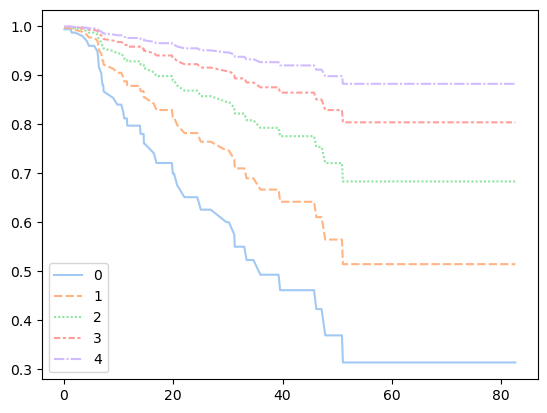

In [292]:
sns.lineplot(cph.predict_survival_function(df))